In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

## Load Dataset IRENA

In [2]:
# base_path = os.path.dirname(__file__)
# file_path = os.path.join(base_path, 'data_test', 'IRENA_Stats_Extract_2024_H1_V1.xlsx')
file_path = 'data_test/IRENA_Stats_Extract_ 2024_H1_V1.xlsx'
data = pd.read_excel(file_path, sheet_name='Country')
data.head()

,Region,Country,ISO3 code,M49 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,Electricity Installed Capacity (MW),Unnamed: 11,Unnamed: 12,Unnamed: 13,0
0,Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2000,5459.01,NaN,NaN,NaN,NaN
1,Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2001,5455.50,NaN,NaN,NaN,NaN
2,Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2002,5891.01,NaN,NaN,NaN,NaN
3,Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2003,6013.24,NaN,NaN,NaN,NaN
4,Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2004,6305.24,NaN,NaN,NaN,NaN


In [40]:
df = data.copy()


In [46]:
df['Group Technology'].unique()

array(['Fossil fuels', 'Hydropower (excl. Pumped Storage)',
       'Solar energy', 'Wind energy', 'Bioenergy', 'Geothermal energy',
       'Pumped storage', 'Nuclear', 'Other non-renewable energy',
       'Marine energy'], dtype=object)

In [42]:
df_renewable = df[df["Group Technology"].isin(['Hydropower (excl. Pumped Storage)',
       'Solar energy', 'Wind energy', 'Bioenergy', 'Geothermal energy',
       'Marine energy'])]

In [44]:
df_fossil = df[df['Group Technology'].isin(['Fossil fuels', 'Nuclear', 'Other non-renewable energy'])]
df_fossil.head(2)

,Region,Country,ISO3 code,M49 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,Electricity Installed Capacity (MW),Unnamed: 11,Unnamed: 12,Unnamed: 13,0
0,Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2000,5459.01,NaN,NaN,NaN,NaN
1,Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2001,5455.50,NaN,NaN,NaN,NaN


In [47]:
df_pump_storage = df[df['Group Technology'].isin(['Pumped storage'])]
df_pump_storage.head(2)

,Region,Country,ISO3 code,M49 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,Electricity Installed Capacity (MW),Unnamed: 11,Unnamed: 12,Unnamed: 13,0
3980,Africa,Morocco,MAR,504,Total Non-Renewable,Pumped storage,Pumped storage,Pumped storage,On-grid electricity,2004,233.0,NaN,NaN,NaN,NaN
3981,Africa,Morocco,MAR,504,Total Non-Renewable,Pumped storage,Pumped storage,Pumped storage,On-grid electricity,2005,464.0,NaN,NaN,NaN,NaN


## Calculate yearly sum worldwide

In [51]:
df_renewable_yearly_sum = (
    df_renewable
    .groupby("Year", as_index=False)["Electricity Installed Capacity (MW)"]
    .sum()
)
df_renewable_yearly_sum.head(2)

,Year,Electricity Installed Capacity (MW)
0,2000,752192.434
1,2001,774174.098


In [49]:
df_fossil_yearly_sum = (
    df_fossil
    .groupby("Year", as_index=False)["Electricity Installed Capacity (MW)"]
    .sum()
)
df_fossil_yearly_sum.head(2)

,Year,Electricity Installed Capacity (MW)
0,2000,2.676966e+06
1,2001,2.700088e+06


In [52]:
df_pump_storage_yearly_sum = (
    df_pump_storage
    .groupby("Year", as_index=False)["Electricity Installed Capacity (MW)"]
    .sum()
)
df_pump_storage_yearly_sum.head(2)

,Year,Electricity Installed Capacity (MW)
0,2000,84966.55
1,2001,80799.55


<Axes: >

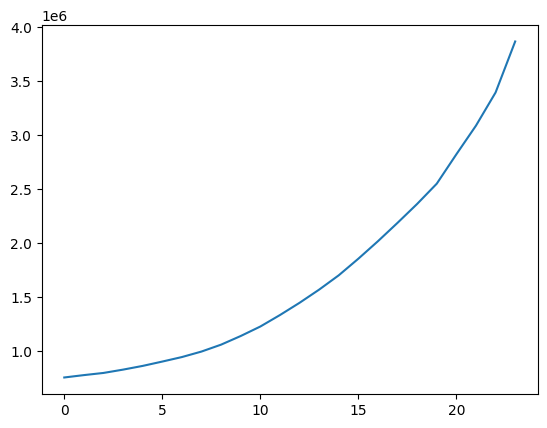

In [25]:
df_renewable_yearly_sum['Electricity Installed Capacity (MW)'].plot()

<Axes: >

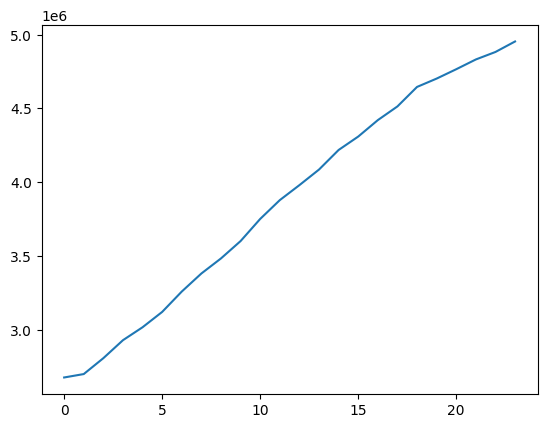

In [50]:
df_fossil_yearly_sum['Electricity Installed Capacity (MW)'].plot()

<Axes: >

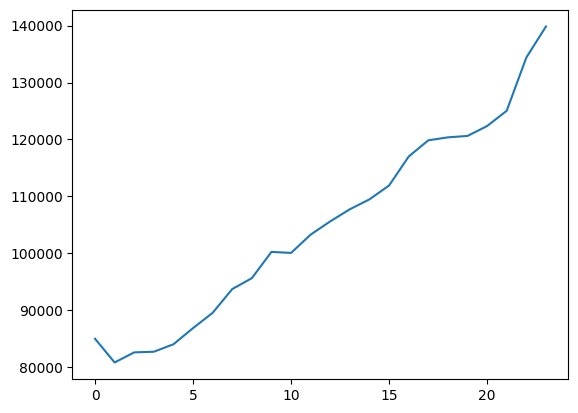

In [53]:
df_pump_storage_yearly_sum['Electricity Installed Capacity (MW)'].plot()

## ARIMA Model



### renewable energies

In [29]:
df_renewable_yearly_sum = df_renewable_yearly_sum.sort_values("Year")
ts_renewable_yearly_sum = df_renewable_yearly_sum.set_index("Year")["Electricity Installed Capacity (MW)"]  # Zeitreihe

In [30]:
model = ARIMA(ts_renewable_yearly_sum, order=(1, 1, 1))
model_fit = model.fit()

/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/py

In [32]:
forecast_renewable_2024 = model_fit.forecast(steps=1)
forecast_renewable_2024.index = [2024]  # Index korrekt setzen
print("Prognose für 2024:", forecast_renewable_2024.iloc[0])
forecast_renewable_2024

Prognose für 2024: 4005251.89377245


/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2024    4.005252e+06
dtype: float64

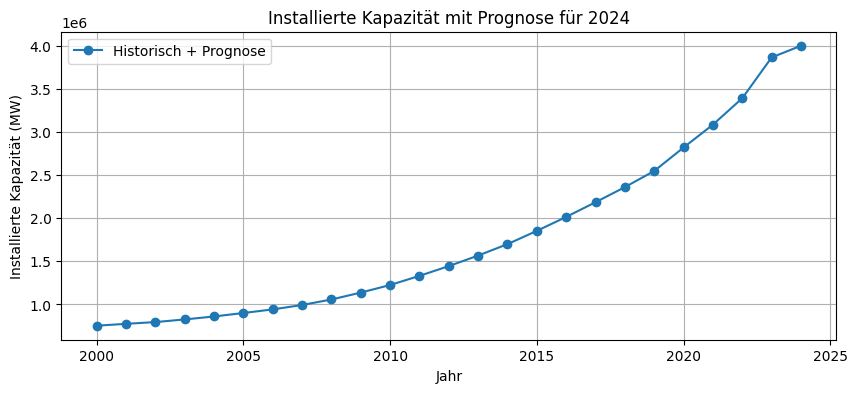

In [33]:
ts_extended = pd.concat([ts_renewable_yearly_sum, forecast_renewable_2024])

# Plot mit durchgehender Linie
ts_extended.plot(label="Historisch + Prognose", figsize=(10, 4), marker='o')
plt.title("Installierte Kapazität mit Prognose für 2024")
plt.xlabel("Jahr")
plt.ylabel("Installierte Kapazität (MW)")
plt.legend()
plt.grid(True)
plt.show()

In [34]:
from pmdarima import auto_arima

# auto_arima wählt optimale Parameter und prüft auf Stationarität
model = auto_arima(ts_renewable_yearly_sum,
                   seasonal=False,    # True, falls du Saisonalität vermutest
                   trace=True,        # zeigt den Suchprozess
                   stepwise=True,     # schneller
                   suppress_warnings=True,
                   error_action='ignore')

# Forecast erzeugen
forecast_renewable_2024 = model.predict(n_periods=1)


/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklea

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=528.653, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=530.440, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=530.492, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=532.781, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=529.798, Time=0.09 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.640 seconds


/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklea

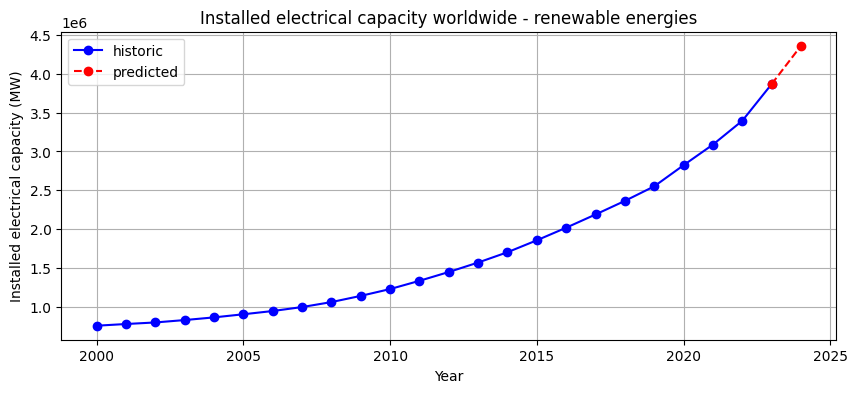

In [79]:
forecast_renewable_2024.index = [2024]

ts_renewable_extended = pd.concat([ts_renewable_yearly_sum, forecast_renewable_2024])

ts_renewable_main = ts_renewable_extended.iloc[:-1]

ts_renewable_transition = ts_renewable_extended.iloc[-2:]

# Plot
plt.figure(figsize=(10, 4))

plt.plot(ts_renewable_main.index, ts_renewable_main.values, label="historic", marker='o', color='blue')

plt.plot(ts_renewable_transition.index, ts_renewable_transition.values, label="predicted",
         color='red', linestyle='--', marker='o')

plt.title("Installed electrical capacity worldwide - renewable energies")
plt.xlabel("Year")
plt.ylabel("Installed electrical capacity (MW)")
plt.legend()
plt.grid(True)
plt.savefig("IRENA_plus_prediction_renewable.png", dpi=300, bbox_inches='tight')

plt.show()

### fossil energy

In [ ]:
df_fossil_yearly_sum = df_fossil_yearly_sum.sort_values("Year")
ts_fossil_yearly_sum = df_fossil_yearly_sum.set_index("Year")["Electricity Installed Capacity (MW)"]

In [55]:
model_fossil = auto_arima(ts_fossil_yearly_sum,
                   seasonal=False,    # True, falls du Saisonalität vermutest
                   trace=True,        # zeigt den Suchprozess
                   stepwise=True,     # schneller
                   suppress_warnings=True,
                   error_action='ignore')

# Forecast erzeugen
forecast_fossil_2024 = model_fossil.predict(n_periods=1)

/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklea

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=545.021, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=576.182, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=540.510, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=598.573, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=551.791, Time=0.05 sec


/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklea

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=542.368, Time=0.06 sec


/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=599.650, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.384 seconds


/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be remo

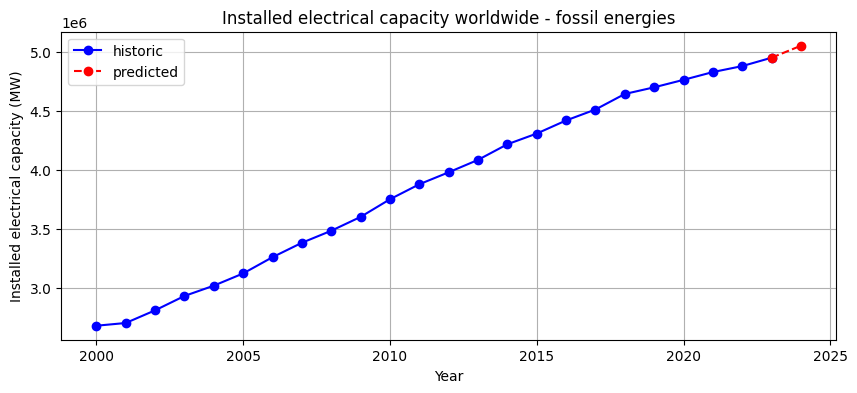

In [78]:
forecast_fossil_2024.index = [2024]

ts_fossil_extended = pd.concat([ts_fossil_yearly_sum, forecast_fossil_2024])

ts_fossil_main = ts_fossil_extended.iloc[:-1]

ts_fossil_transition = ts_fossil_extended.iloc[-2:]

# Plot
plt.figure(figsize=(10, 4))

plt.plot(ts_fossil_main.index, ts_fossil_main.values, label="historic", marker='o', color='blue')

plt.plot(ts_fossil_transition.index, ts_fossil_transition.values, label="predicted",
         color='red', linestyle='--', marker='o')

plt.title("Installed electrical capacity worldwide - fossil energies")
plt.xlabel("Year")
plt.ylabel("Installed electrical capacity (MW)")
plt.legend()
plt.grid(True)
plt.savefig("IRENA_plus_prediction_fossil.png", dpi=300, bbox_inches='tight')

plt.show()

### pump storage

In [ ]:
df_pump_storage_yearly_sum = df_pump_storage_yearly_sum.sort_values("Year")
ts_pump_storage_yearly_sum = df_pump_storage_yearly_sum.set_index("Year")["Electricity Installed Capacity (MW)"]

In [60]:
model_pump_storage = auto_arima(ts_pump_storage_yearly_sum,
                   seasonal=False,    # True, falls du Saisonalität vermutest
                   trace=True,        # zeigt den Suchprozess
                   stepwise=True,     # schneller
                   suppress_warnings=True,
                   error_action='ignore')

# Forecast erzeugen
forecast_pump_storage_2024 = model_pump_storage.predict(n_periods=1)

/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklea

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=431.277, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=428.592, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=425.674, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=423.075, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=441.780, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=425.695, Time=0.07 sec


/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklea

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=424.532, Time=0.17 sec


/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=426.797, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=443.458, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.926 seconds


/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be remo

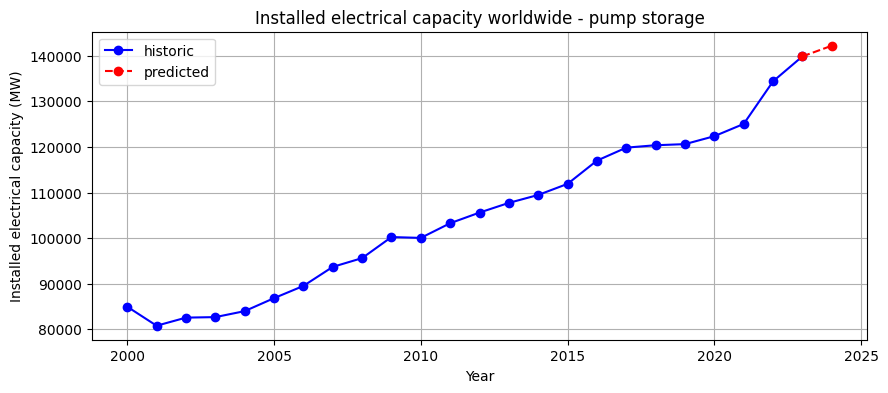

In [77]:
forecast_pump_storage_2024.index = [2024]

ts_pump_extended = pd.concat([ts_pump_storage_yearly_sum, forecast_pump_storage_2024])

ts_pump_main = ts_pump_extended.iloc[:-1]

ts_pump_transition = ts_pump_extended.iloc[-2:]

# Plot
plt.figure(figsize=(10, 4))

plt.plot(ts_pump_main.index, ts_pump_main.values, label="historic", marker='o', color='blue')

plt.plot(ts_pump_transition.index, ts_pump_transition.values, label="predicted",
         color='red', linestyle='--', marker='o')

plt.title("Installed electrical capacity worldwide - pump storage")
plt.xlabel("Year")
plt.ylabel("Installed electrical capacity (MW)")
plt.legend()
plt.grid(True)
plt.savefig("IRENA_plus_prediction_pump_storage.png", dpi=300, bbox_inches='tight')

plt.show()

### Share renewable/total energy (without pump storage)

In [66]:
ts_share_extended = (ts_renewable_extended / (ts_fossil_extended + ts_renewable_extended)) * 100
ts_share_extended

2000    21.935191
2001    22.283126
2002    22.050037
2003    21.975323
2004    22.171852
2005    22.378111
2006    22.415893
2007    22.695843
2008    23.276046
2009    23.995295
2010    24.615951
2011    25.552956
2012    26.632964
2013    27.723822
2014    28.724999
2015    30.082301
2016    31.325865
2017    32.639750
2018    33.710934
2019    35.164476
2020    37.199678
2021    38.997117
2022    41.023977
2023    43.857333
2024    46.326661
dtype: float64

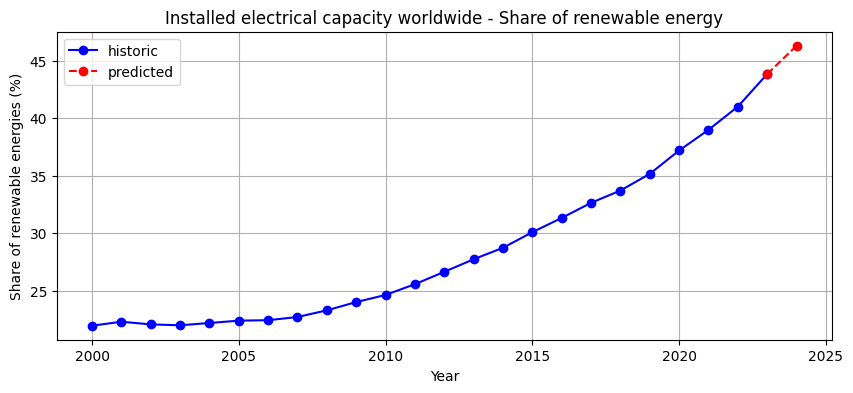

In [76]:
ts_share_main = ts_share_extended.iloc[:-1]

ts_share_transition = ts_share_extended.iloc[-2:]

# Plot
plt.figure(figsize=(10, 4))

plt.plot(ts_share_main.index, ts_share_main.values, label="historic", marker='o', color='blue')

plt.plot(ts_share_transition.index, ts_share_transition.values, label="predicted",
         color='red', linestyle='--', marker='o')

plt.title("Installed electrical capacity worldwide - Share of renewable energy")
plt.xlabel("Year")
plt.ylabel("Share of renewable energies (%)")
plt.legend()
plt.grid(True)
plt.savefig("IRENA_plus_prediction_share_renewable.png", dpi=300, bbox_inches='tight')

plt.show()

## Create csv-file with the years 2022 to 2024

In [ ]:
df_1 = ts_share_extended.tail(3).to_frame(name='share (%)')
df_2 = ts_renewable_extended.tail(3).to_frame(name='renewables (MW)')
df_3 = ts_fossil_extended.tail(3).to_frame(name='fossil (MW)')
df_4=ts_pump_extended.tail(3).to_frame(name='pump_storage (MW)')


In [73]:
# Gemeinsames DataFrame: nach Index (Jahr) zusammenfügen
df_combined = pd.concat([df_1, df_2, df_3, df_4], axis=1)
df_combined

,share,renewables,fossil,pump_storage
2022,41.023977,3.396323e+06,4.882551e+06,134383.644000
2023,43.857333,3.869705e+06,4.953688e+06,139851.244400
2024,46.326661,4.363604e+06,5.055603e+06,142184.579045


In [75]:
df_combined.to_csv('IRENA_plus_prediction2024.csv', index=True)
